In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras import Input

In [46]:
df = pd.read_csv("./datasets/fish.csv")
print(df.shape)
df.head()

(159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [48]:
labels = pd.get_dummies(df['Species'])
df.drop('Species', axis = 'columns', inplace = True)

In [49]:
df = df.join(labels)
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [50]:
colnames = df.columns

In [51]:
xvals = np.array(df[colnames[colnames != 'Weight']], ndmin = 2)
yvals = np.array(df['Weight'])
x_shape = xvals.shape

In [52]:
model = Sequential()
nodes = 5000

model.add(Input(shape = (x_shape[1])))
model.add(Dense(nodes, activation='relu'))
model.add(Dense(nodes, activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.fit(xvals, yvals, epochs = 100, validation_split = 0.2, verbose = 1)

Epoch 1/100
4/4 [==============================] - 0s 99ms/step - loss: 185161.1562 - mean_absolute_error: 306.7601 - val_loss: 124368.5625 - val_mean_absolute_error: 222.0880
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 54180.1602 - mean_absolute_error: 204.2208 - val_loss: 104447.7188 - val_mean_absolute_error: 302.0092
Epoch 3/100
4/4 [==============================] - 0s 68ms/step - loss: 57929.1289 - mean_absolute_error: 218.9211 - val_loss: 80782.9062 - val_mean_absolute_error: 232.1049
Epoch 4/100
4/4 [==============================] - 0s 68ms/step - loss: 45922.3633 - mean_absolute_error: 180.5562 - val_loss: 109484.3125 - val_mean_absolute_error: 215.9023
Epoch 5/100
4/4 [==============================] - 0s 69ms/step - loss: 48879.8594 - mean_absolute_error: 176.5891 - val_loss: 91253.1016 - val_mean_absolute_error: 220.6718
Epoch 6/100
4/4 [==============================] - 0s 69ms/step - loss: 38178.3594 - mean_absolute_error: 172.9557 - val_loss:

In [53]:
predictions = model.predict(xvals)
error = np.mean(np.absolute(predictions - yvals))
print("Mean absolute error : ", error)

Mean absolute error :  404.7815530900483


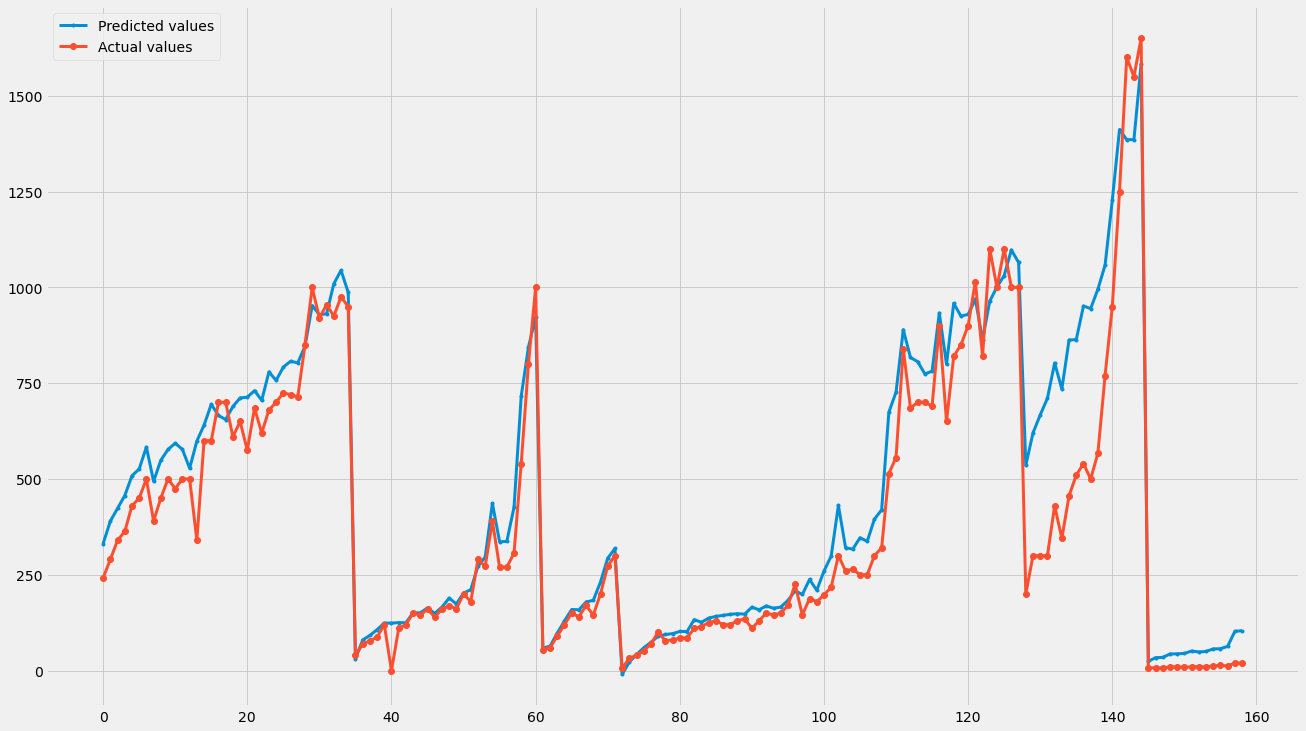

In [54]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (20,12))
plt.plot(range(0,159), predictions, linewidth = 3, marker = '.', label = 'Predicted values')
plt.plot(range(0,159), yvals, linewidth = 3, marker = 'o', label = 'Actual values')
plt.grid(True)
plt.legend()
plt.show()